In [2]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
DISEASE_PATH = '../Data/interim/disease_SG/weekly-dengue-malaria-cleaned.csv'
WEATHER_DIR = '../Data/interim/weather_SG'

In [55]:
# Load data as a pandas DataFrame
dfDisease = pd.read_csv(disease_path)
weather_files = os.listdir(weather_dir)

In [56]:
dfDisease.sort_values(by=['year','week'], inplace=True)
dfDisease.reset_index(drop=True, inplace=True)
dfDisease.head()

,year,week,Dengue,Malaria
0,2012,1,74,1
1,2012,2,66,2
2,2012,3,61,2
3,2012,4,52,3
4,2012,5,85,1


## Plot trends of the disease data - number of cases on weekly basis

In [7]:
colors = sns.color_palette(palette='colorblind')
markers = ['*', 's', 'p', '8','h']

## Malaria

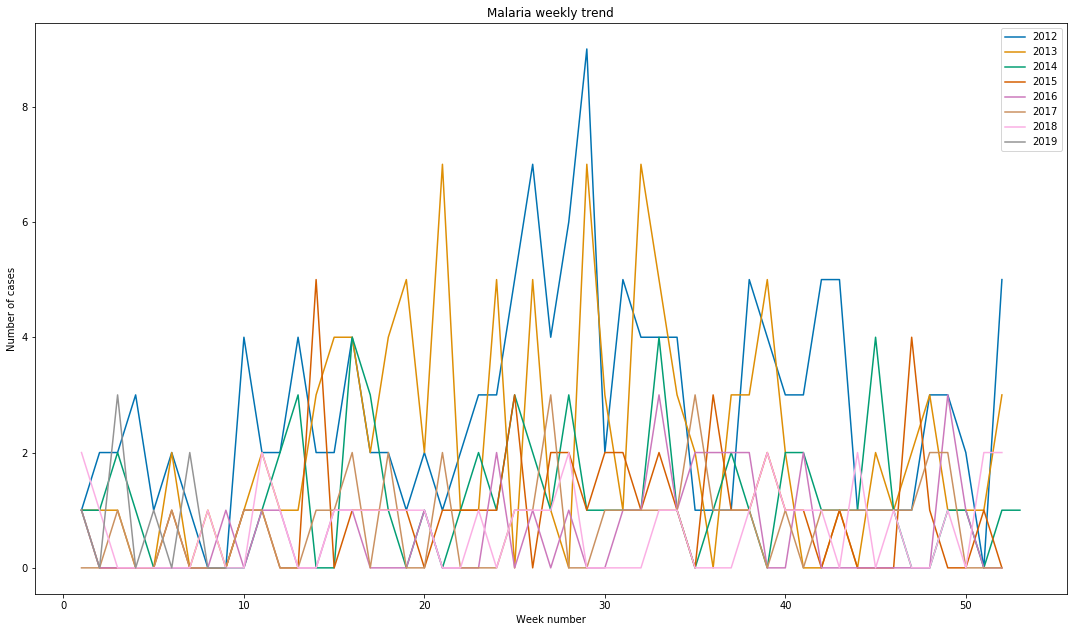

In [134]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5);
for i, year in enumerate(range(2012, 2020)):
    df_year = dfDisease[dfDisease['year']==year]
    plt.plot(df_year.week, df_year.Malaria, color = colors[i], label=str(year))
    plt.legend()
    plt.xlabel('Week number')
    plt.ylabel('Number of cases')
    plt.title('Malaria weekly trend')
plt.savefig('malaria.png')

## Dengue Fever

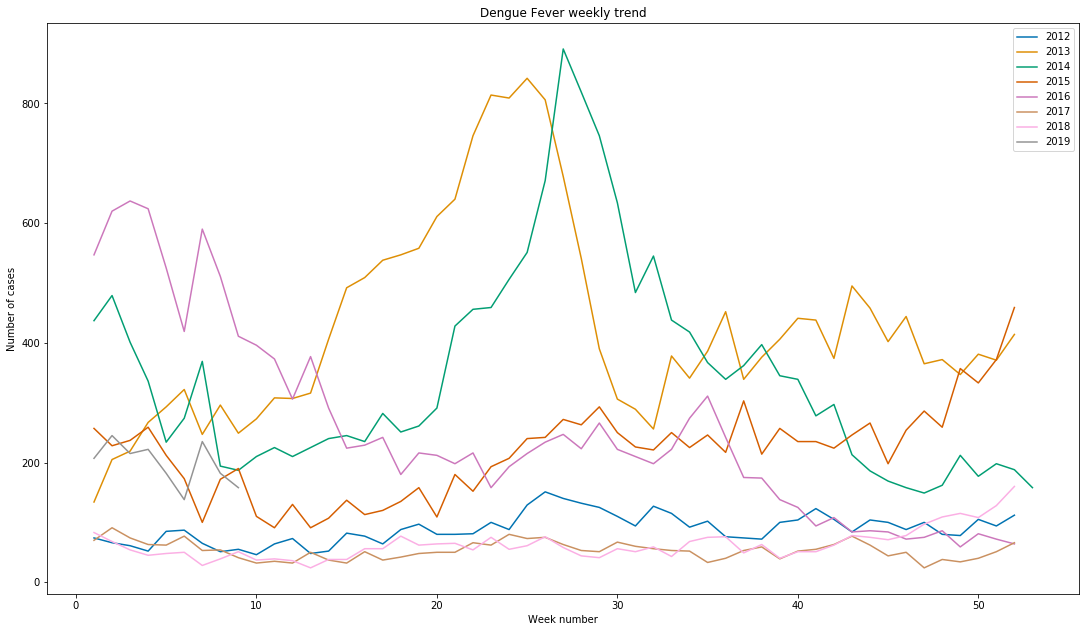

In [135]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5);
for i, year in enumerate(range(2012, 2020)):
    df_year = dfDisease[dfDisease['year']==year]
    plt.plot(df_year.week, df_year.Dengue, color = colors[i], label=str(year))
    plt.legend()
    plt.xlabel('Week number')
    plt.ylabel('Number of cases')
    plt.title('Dengue Fever weekly trend')
plt.savefig('dengue.png')

# Disease trend over years

In [59]:
from datetime import datetime
dfDisease['date'] = pd.to_datetime(dfDisease.year.astype(str), format='%Y') + \
                     pd.to_timedelta(dfDisease.week.mul(7).astype(str) + ' days')

In [132]:
len(dfDisease)

374

Text(0.5, 1.0, 'Dengue historical weekly 2012-2019')

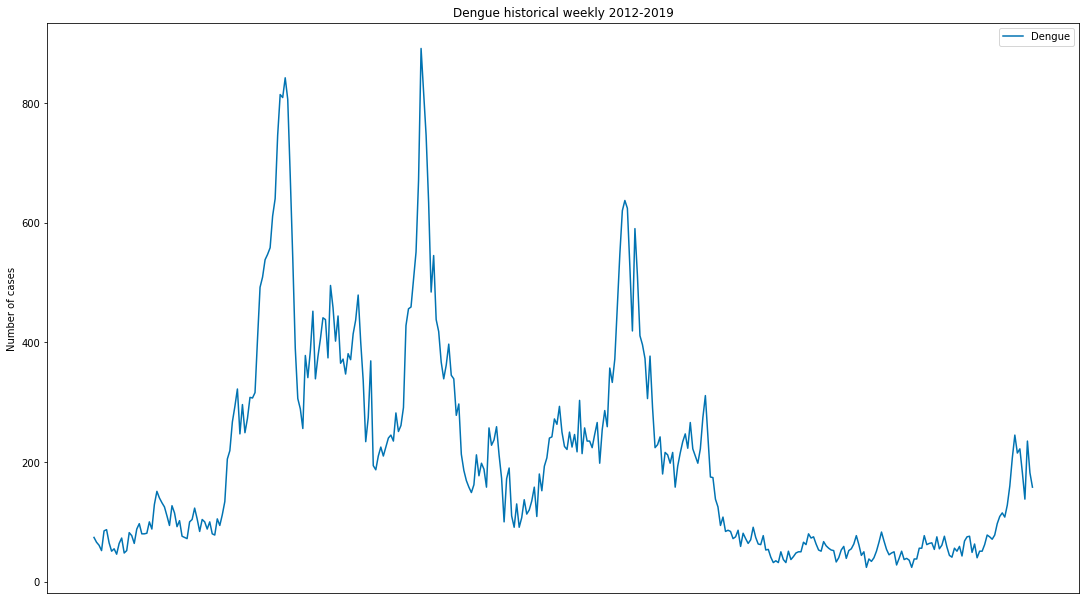

In [61]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5);
plt.plot(dfDisease.index, dfDisease.Dengue, color = colors[0], label='Dengue')
plt.gca().axes.get_xaxis().set_visible(False)
plt.legend()
plt.ylabel('Number of cases')
plt.title('Dengue historical weekly 2012-2019')

Text(0.5, 1.0, 'Malaria historical weekly trend 2012-2019')

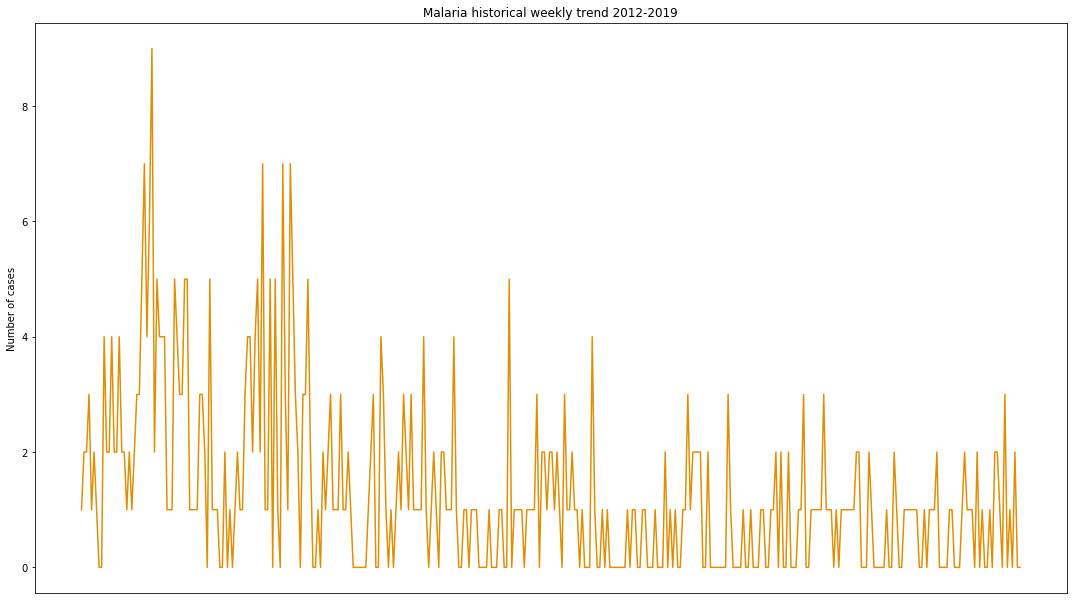

In [62]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5);
plt.plot(dfDisease.index, dfDisease.Malaria, color = colors[1], label='Malaria')
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Number of cases')
plt.title('Malaria historical weekly trend 2012-2019')

# Combine disease and weather data

In [103]:
# Get all weather files
ddWeather = []
for file in weather_files:
    path = os.path.join(WEATHER_DIR, file)
    ddWeather.append(pd.read_csv(path))

In [104]:
len(ddWeather)

17

In [105]:
df_concat = pd.concat(ddWeather, axis=1)

In [107]:
df_concat = df_concat.drop('location', axis=1)
df_concat.head()

,year,week,month,day,Rainfall Total,Max 30Min Rainfall,Max 60Min Rainfall,Max 120Min Rainfall,Mean Temperature,Max Temperature,...,day,Rainfall Total,Max 30Min Rainfall,Max 60Min Rainfall,Max 120Min Rainfall,Mean Temperature,Max Temperature,Min Temperature,Mean Wind Speed,Max Wind Speed
0,2012,1,1,1,3.8,NaN,NaN,NaN,26.928571,31.6,...,1,1.8,NaN,NaN,NaN,27.714286,32.9,25.4,10.771429,38.9
1,2012,2,1,8,32.4,NaN,NaN,NaN,25.928571,32.5,...,8,19.0,NaN,NaN,NaN,26.671429,32.4,24.1,9.528571,38.9
2,2012,3,1,15,101.4,NaN,NaN,NaN,27.142857,34.6,...,15,14.2,NaN,NaN,NaN,27.800000,32.8,22.5,5.628571,52.6
3,2012,4,1,22,30.4,NaN,NaN,NaN,26.300000,32.8,...,22,13.6,NaN,NaN,NaN,27.185714,33.2,23.3,9.142857,46.4
4,2012,5,1,29,85.6,NaN,NaN,NaN,26.200000,32.5,...,29,34.4,NaN,NaN,NaN,26.928571,32.9,21.3,8.171429,33.8


In [112]:
df_weather_mean = df_concat.stack().groupby(level=[0,1]).mean().unstack()

In [123]:
df_weather_mean.head()

,Max 120Min Rainfall,Max 30Min Rainfall,Max 60Min Rainfall,Max Temperature,Max Wind Speed,Mean Temperature,Mean Wind Speed,Min Temperature,Rainfall Total,day,month,week,year
0,NaN,NaN,NaN,32.111765,43.429412,27.320294,11.575630,24.464706,4.335294,1.0,1.0,1,2012
1,NaN,NaN,NaN,31.935294,44.329412,26.089076,9.309244,23.488235,31.458824,8.0,1.0,2,2012
2,NaN,NaN,NaN,33.082353,47.888235,27.257563,6.901681,22.311765,68.558824,15.0,1.0,3,2012
3,NaN,NaN,NaN,32.282353,41.652941,26.639706,9.516807,23.023529,30.264706,22.0,1.0,4,2012
4,NaN,NaN,NaN,32.129412,44.700000,26.490756,9.305042,22.452941,50.117647,29.0,1.0,5,2012


In [122]:
df_weather_mean[['year','week']] = df_weather_mean[['year','week']].applymap(int)

In [114]:
print(dfDisease.shape, dfWeather.shape, df_weather_mean.shape)

(374, 5) (369, 14) (373, 13)


In [124]:
dfData = df_weather_mean.merge(dfDisease, on=['year','week'])
dfData[350:]

,Max 120Min Rainfall,Max 30Min Rainfall,Max 60Min Rainfall,Max Temperature,Max Wind Speed,Mean Temperature,Mean Wind Speed,Min Temperature,Rainfall Total,day,month,week,year,Dengue,Malaria,date
350,17.109091,12.327273,16.254545,33.492308,40.361538,28.500433,7.284799,24.376923,24.160000,25.733333,8.800000,38,2018,63,1,2018-09-24
351,27.800000,17.200000,24.490909,32.746154,43.857143,27.646753,7.319796,22.946154,59.433333,16.000000,9.000000,38,2018,63,1,2018-09-24
352,39.618182,25.672727,33.109091,32.515385,46.214286,27.542208,6.849252,22.969231,71.200000,4.066667,9.733333,36,2018,76,0,2018-09-10
353,26.116667,17.733333,23.716667,33.246154,48.185714,27.953247,7.268112,23.500000,56.666667,20.666667,8.400000,36,2018,76,0,2018-09-10
354,18.800000,14.836364,17.981818,32.730769,37.735714,27.723701,7.628231,23.784615,36.993333,9.000000,9.000000,37,2018,49,0,2018-09-17
355,5.090909,4.636364,5.090909,33.530769,36.150000,28.711688,8.119184,24.623077,11.173333,23.000000,9.000000,39,2018,40,2,2018-10-01
356,16.218182,11.836364,14.818182,32.891667,38.146154,27.385714,6.522637,24.166667,42.342857,27.857143,8.857143,39,2018,40,2,2018-10-01
357,26.060000,16.980000,22.500000,33.341667,36.584615,27.620571,6.331685,24.008333,57.500000,4.000000,9.857143,40,2018,51,1,2018-10-08
358,27.920000,19.000000,24.120000,32.591667,49.853846,27.372857,5.803077,22.950000,70.128571,11.000000,9.857143,41,2018,51,1,2018-10-15
359,15.200000,12.288889,14.644444,32.827273,36.800000,27.639683,6.650417,24.200000,51.516667,1.916667,10.166667,41,2018,51,1,2018-10-15


In [68]:
dfData.columns

Index(['location', 'year', 'week', 'month', 'day', 'Rainfall Total',
       'Max 30Min Rainfall', 'Max 60Min Rainfall', 'Max 120Min Rainfall',
       'Mean Temperature', 'Max Temperature', 'Min Temperature',
       'Mean Wind Speed', 'Max Wind Speed', 'Dengue', 'Malaria', 'date'],
      dtype='object')

In [ ]:
dfData = dfData.drop(columns=['lo'])

In [78]:
dfData.describe()

,year,week,month,day,Rainfall Total,Max 30Min Rainfall,Max 60Min Rainfall,Max 120Min Rainfall,Mean Temperature,Max Temperature,Min Temperature,Mean Wind Speed,Max Wind Speed,Dengue,Malaria
count,368.000000,368.00000,368.000000,368.000000,368.000000,252.000000,252.000000,252.000000,357.000000,357.000000,357.000000,357.000000,357.000000,368.000000,368.000000
mean,2015.081522,25.76087,6.366848,15.633152,42.592391,14.363492,17.896032,20.076190,27.660516,33.387955,23.619048,8.090500,46.358263,207.426630,1.282609
std,2.073286,15.07429,3.501450,8.814695,40.375060,12.154357,15.615259,17.675821,0.938515,1.081793,0.992034,2.451976,8.979197,175.920592,1.486184
min,2012.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,23.928571,29.200000,21.200000,4.671429,28.400000,24.000000,0.000000
25%,2013.000000,12.75000,3.000000,8.000000,9.100000,4.300000,4.400000,5.150000,27.028571,32.700000,23.000000,6.400000,40.000000,68.000000,0.000000
50%,2015.000000,26.00000,6.000000,16.000000,34.800000,12.200000,14.300000,15.800000,27.675000,33.500000,23.500000,7.100000,44.600000,155.000000,1.000000
75%,2017.000000,39.00000,9.000000,23.000000,63.250000,21.800000,27.950000,31.750000,28.266667,34.100000,24.200000,9.100000,51.800000,286.750000,2.000000
max,2019.000000,52.00000,12.000000,31.000000,182.600000,64.800000,85.600000,88.800000,30.257143,36.300000,27.200000,16.871429,86.800000,891.000000,9.000000


In [125]:
# Combined:
dfData.describe()

,Max 120Min Rainfall,Max 30Min Rainfall,Max 60Min Rainfall,Max Temperature,Max Wind Speed,Mean Temperature,Mean Wind Speed,Min Temperature,Rainfall Total,day,month,week,year,Dengue,Malaria
count,277.000000,277.000000,277.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,19.079678,13.444410,16.843582,32.999603,43.904864,27.904437,8.273381,23.754070,42.276730,15.612651,6.394575,25.509383,2015.072386,212.241287,1.386059
std,8.933209,5.757073,7.614286,0.655342,4.478843,0.697893,1.510467,0.754279,26.218157,8.516552,2.849676,12.433394,2.060278,173.971326,1.448402
min,0.000000,0.000000,0.000000,30.270588,32.362500,25.647899,5.280672,21.564706,0.017647,1.000000,1.000000,1.000000,2012.000000,24.000000,0.000000
25%,13.157143,10.076923,11.923077,32.652941,41.235294,27.485873,7.204202,23.278571,23.652941,8.000000,4.000000,15.000000,2013.000000,65.000000,0.000000
50%,18.728571,13.800000,16.661538,33.035294,43.429412,27.932817,8.129422,23.700000,37.390000,15.687500,7.000000,28.000000,2015.000000,190.000000,1.000000
75%,26.116667,17.381818,22.500000,33.392857,46.206667,28.356134,9.127031,24.166667,56.906250,23.000000,8.625000,35.000000,2017.000000,291.000000,2.000000
max,43.830769,26.292308,35.538462,34.737500,58.137500,30.017507,13.221714,26.558824,164.600000,31.000000,12.000000,52.000000,2019.000000,891.000000,9.000000


# Disease vs weather plot

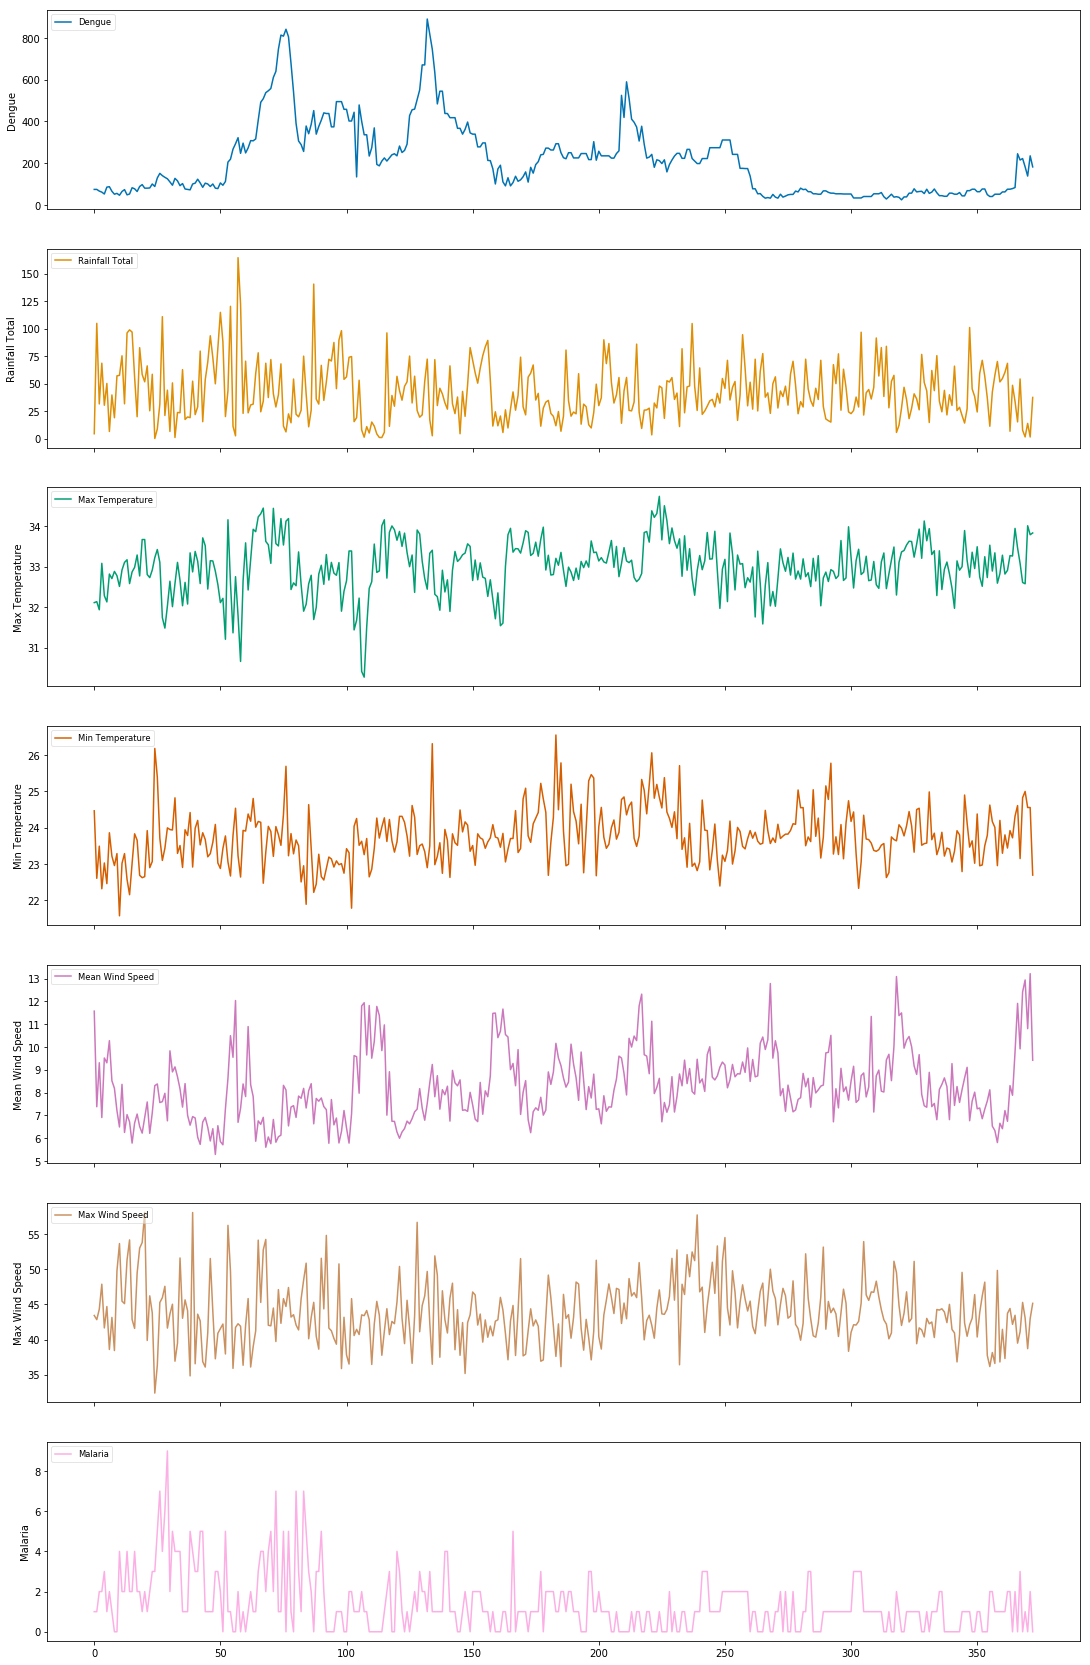

In [136]:
labels = ['Dengue','Rainfall Total','Max Temperature', 'Min Temperature',
           'Mean Wind Speed', 'Max Wind Speed', 'Malaria']
num_of_axes = len(labels)
fig, axes = plt.subplots(nrows=num_of_axes, ncols=1, sharex=True, sharey=False, figsize=(8,8))
fig.set_size_inches(18.5, 30)
plt.figure(1)
for i in range(num_of_axes):
    ax = axes[i]
    #ax.set_ylim([dfData[labels[i]].min(),dfData[labels[i]].max()])
    ax.plot(dfData.index, dfData[labels[i]], label=labels[i], color=colors[i])
    ax.set_ylabel(labels[i])
    ax.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.savefig('stacked-combined.png')


# Explore time series

In [130]:
os.makedirs('../Data/interim/data_SG/', exist_ok=True)

In [131]:
dfData.to_csv('../Data/interim/data_SG/combined.csv')